Imports

In [2]:
import pandas as pd
import openml as oml
import sklearn
from math import sqrt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA


In [3]:

def euclidean_distance(instance1, instance2):
    distance = 0.0
    for i in range(len(instance1)):
        distance += (instance1[i] - instance2[i])**2
    return sqrt(distance)

def get_neighbors(train_set, test_instance, k):
    distances = []
    for index, row in train_set.iterrows():
        dist = euclidean_distance(row[:-1], test_instance)
        distances.append((index, dist))
    distances.sort(key=lambda x: x[1])
    neighbors = [train_set.loc[i[0]] for i in distances[:k]]
    return neighbors

def get_response(neighbors):
    class_votes = {}
    for neighbor in neighbors:
        response = neighbor[-1]
        if response in class_votes:
            class_votes[response] += 1
        else:
            class_votes[response] = 1
    sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

def k_nearest_neighbors(train_set, test_set, k):
    predictions = []
    for index, row in test_set.iterrows():
        neighbors = get_neighbors(train_set, row[:-1], k)
        result = get_response(neighbors)
        predictions.append(result)
    return predictions


In [4]:
# funções de teste do Dataset
from sklearn.discriminant_analysis import StandardScaler


def holdout_estimation(model,X,y,test_size=0.3,seed=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #print(f'Estimated accuracy by holdout {accuracy_score(y_test,y_pred)}')
    return(accuracy_score(y_test,y_pred))

def plot_ds2D(X,y):
    sns.scatterplot(x=X['X1'],y=X['X2'],hue=y,palette="deep")
    plt.show()

def plot_decisionBound(model,X,y):
    disp = DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict",
    alpha=0.5)
    disp.ax_.scatter(X['X1'], X['X2'], c=y, edgecolor="k")
    plt.show()


def printDataSetInfo(df):
    print(df.head())
    print(df.shape)
    print(df.info())
    print(df.describe())

def printDataSetGraphInfo(df, coluna):
    plt.figure()
    sns.histplot(data=df, x=coluna)
    plt.show()
    plt.figure()
    sns.boxplot(data=df, x=coluna)
    plt.show()
    plt.figure()
    sns.kdeplot(data=df, x=coluna)
    plt.show()
    plt.figure()
    #Verifique a correlação entre as variáveis usando um heatmap
    sns.heatmap(df.corr(), annot=True)
    plt.show()
    plt.figure()
    sns.heatmap(df.isnull(), cmap='viridis')
    plt.show()
    
def printOutliers(df):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.flatten()

    for i, col in enumerate(df.columns[:-1]):
        sns.boxplot(data=df[col], ax=axs[i])
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()

def printDistribution(df):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.flatten()

    for i, col in enumerate(df.columns[:-1]):
        sns.histplot(df[col],ax=axs[i])
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()    

def printCorrelation(df):
    sns.pairplot(df)  
    plt.show()  
    
def identificarColunaRedundantes(df):
    high_corr_cols = set() # Criar um conjunto vazio para armazenar as colunas com alta correlação

    # Loop pelas colunas da matriz de correlação
    for i in range(len(df.columns)):
        for j in range(i):
            # Se a correlação for maior que 0,8
            if abs(df.iloc[i, j]) > 0.8:
                # Adicionar as duas colunas ao conjunto high_corr_cols
                colname = df.columns[i]
                high_corr_cols.add(colname)
    print("Colunas Alta relação logo redundantes")                
    print(high_corr_cols)
    #rRemove as colunas redundantes 
    #df = df.drop(high_corr_cols, axis=1)

def identificarVariancia(df):
    low_var_cols = set() # Criar um conjunto vazio para armazenar as colunas com baixa variância

# Loop pelas colunas do DataFrame
    for col in df.columns:
        # Se a variância for menor que 0,1
        if df[col].var() < 0.1:
            # Adicionar a coluna ao conjunto low_var_cols
            low_var_cols.add(col)
    print("Colunas baixa variancia provavelmente descartaveis")                
    print(low_var_cols)


def AnaliseComponentes(df):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    pca = PCA(n_components=2)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    print("pca_compomentes")
    print(X_pca)


Ligação aos repositórios dos openml

Alguns do que já têm informação de KNN
 
#Task (id:10101)Supervised Classification on blood-transfusion-service-center -> Dataset (1464) blood-transfusion-service-center
#Task (id:9957)Supervised Classification on qsar-biodeg -> Dataset (1494) qsar-biodeg
#Task (id:9946)Supervised Classification on wdbc -> Dataset (1510) wdbc
#Task (id:9971)Supervised Classification on ilpd -> Dataset (1480) ilpd
#Task (id:9952)Supervised Classification on phoneme -> Dataset (1489) phoneme
#Task (id:9978)Supervised Classification on ozone-level-8hr -> Dataset (1487)  ozone-level-8hr
#Task (id:2074)Supervised Classification on satimage -> Dataset (182)  satimage



In [5]:

dataset = oml.datasets.get_dataset(1464)

# Print a summary
print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[:500])



This is dataset 'blood-transfusion-service-center', the target feature is 'Class'
URL: https://api.openml.org/data/v1/download/1586225/blood-transfusion-service-center.arff
**Author**: Prof. I-Cheng Yeh  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)  
**Please cite**: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.   

**Blood Transfusion Service Center Data Set**  
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

To demonstrate the RFMTC marketing 


In [6]:
# Analise de dados
X, y, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, dataset_format="dataframe"
)
# adicionar o resultado ao dataset
Z=X.copy()
X["y"] = y

print("Results")
print(X) 


Results
     V1  V2       V3  V4  y
0     2  50  12500.0  98  2
1     0  13   3250.0  28  2
2     1  16   4000.0  35  2
3     2  20   5000.0  45  2
4     1  24   6000.0  77  1
..   ..  ..      ...  .. ..
743  23   2    500.0  38  1
744  21   2    500.0  52  1
745  23   3    750.0  62  1
746  39   1    250.0  39  1
747  72   1    250.0  72  1

[748 rows x 5 columns]


   V1  V2       V3  V4
0   2  50  12500.0  98
1   0  13   3250.0  28
2   1  16   4000.0  35
3   2  20   5000.0  45
4   1  24   6000.0  77
(748, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    uint8  
 1   V2      748 non-null    uint8  
 2   V3      748 non-null    float64
 3   V4      748 non-null    uint8  
dtypes: float64(1), uint8(3)
memory usage: 8.2 KB
None
               V1          V2            V3          V4
count  748.000000  748.000000    748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086
std      8.095396    5.839307   1459.826781   24.376714
min      0.000000    1.000000    250.000000    2.000000
25%      2.750000    2.000000    500.000000   16.000000
50%      7.000000    4.000000   1000.000000   28.000000
75%     14.000000    7.000000   1750.000000   50.000000
max     74.000000   50.0

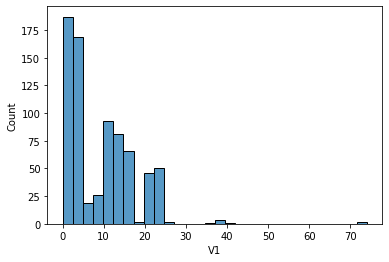

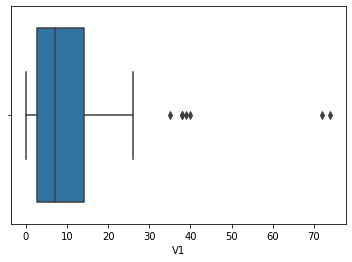

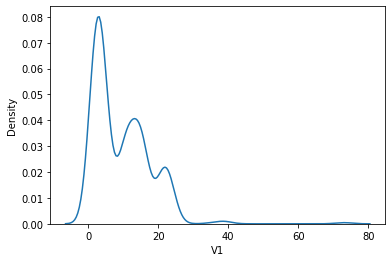

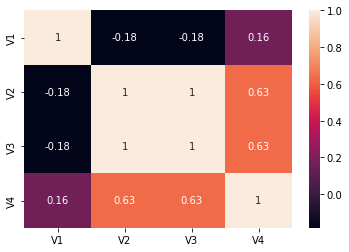

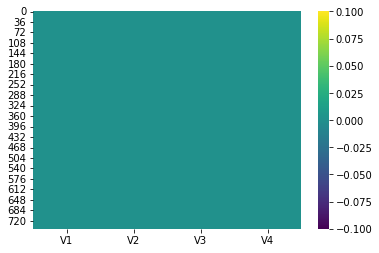

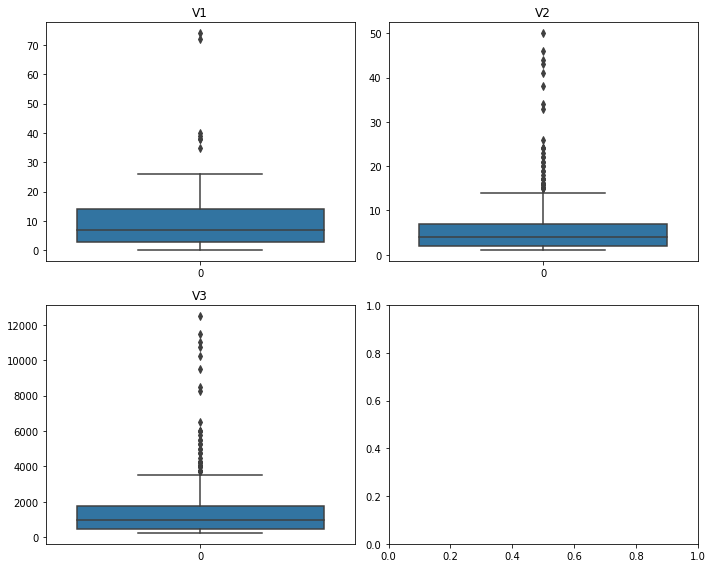

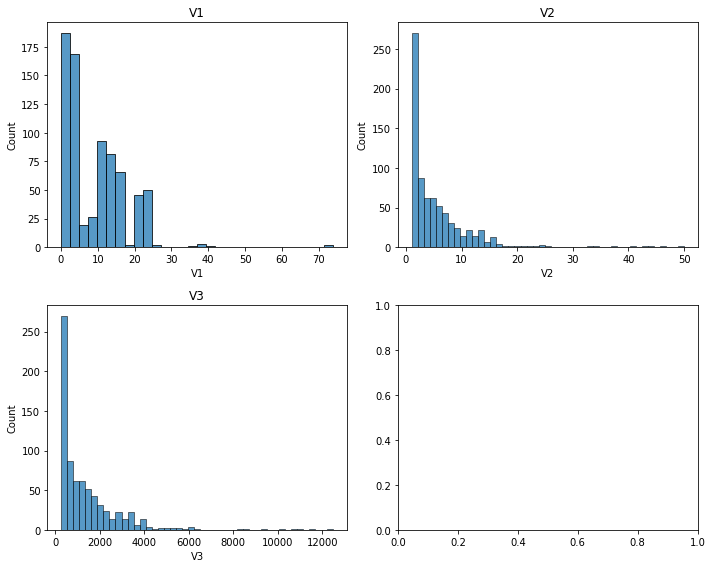

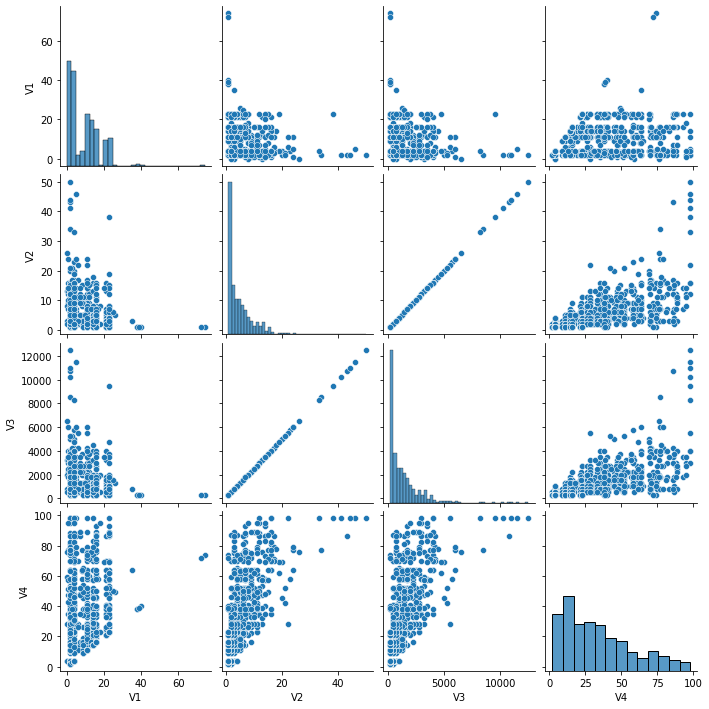

Colunas Alta relação logo redundantes
{'V3', 'V4'}
Colunas baixa variancia provavelmente descartaveis
set()
pca_compomentes
[[10.69838893 -1.14319913]
 [ 1.55064241 -1.39321566]
 [ 2.30952269 -1.25726024]
 ...
 [-0.12072467  2.03717846]
 [-1.19099115  3.54354904]
 [-0.90320403  7.79796776]]


In [7]:
# analise do dataset
printDataSetInfo(Z)
printDataSetGraphInfo(Z,'V1')
printOutliers(Z)
printDistribution(Z)
printCorrelation(Z)
identificarColunaRedundantes(Z)
identificarVariancia(Z)
AnaliseComponentes(Z)
#teste

In [8]:
# Tentativa 1 de correr codigo com knn basico



X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)
prediction = k_nearest_neighbors(X_train,X_test,3)
X_test['result'] = prediction
print(X_test)

     V1  V2       V3  V4  y result
258   4   3    750.0  28  1      1
521   2  11   2750.0  41  2      1
14    2   6   1500.0  15  2      2
31    4  10   2500.0  28  2      2
505   2  41  10250.0  98  2      1
..   ..  ..      ...  .. ..    ...
267  11   8   2000.0  46  1      1
362   4   3    750.0  71  1      1
501   6  22   5500.0  28  2      2
310  11   5   1250.0  38  1      1
200   4   6   1500.0  52  1      1

[225 rows x 6 columns]
